In [294]:
import sys
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

In [295]:
# Pendulum rod lengths (m) and masses (kg).
L1, L2 = 1, 1.5
m1, m2 = 1, 2
# The gravitational acceleration (m.s-2).
g = 9.81
# Check that the integration conserves total energy to within this absolute
# tolerance.
EDRIFT = 0.05

In [296]:
def deriv(t, y, L1, L2, m1, m2):
    """Return the derivatives of y = theta1, p_theta1, theta2, p_theta2.

    These are the generalized coordinates (here, angles) and generalized
    momenta for the two rigid rods.

    """

    theta1, p_theta1, theta2, p_theta2 = y

    M = m1 + 3*m2
    c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
    Lr = L1 / L2
    den = 4 * M - 9 * m2 * c**2

    theta1dot = 6 / L1**2 * (2*p_theta1 - 3 * Lr * c * p_theta2) / den
    theta2dot = 6 / m2 / L2**2 * (
                    (2 * p_theta2 * M - 3 * m2 / Lr * c * p_theta1) / den)
    term = m2 * L1 * L2 / 2 * theta1dot * theta2dot * s
    p_theta1dot = -term - (m1/2 + m2) * g * L1 * np.sin(theta1)
    p_theta2dot = term - m2/2 * g * L2 * np.sin(theta2)

    return theta1dot, p_theta1dot, theta2dot, p_theta2dot

In [297]:
def calc_H(y, L1, L2, m1, m2):
    """Calculate the Hamiltonian at y = theta1, p_theta1, theta2, p_theta2."""
    theta1, p_theta1, theta2, p_theta2 = y

    theta1dot, p_theta1dot, theta2dot, p_theta2dot = deriv(None, y, L1, L2,
                                                           m1, m2)
    # The Lagrangian
    c = np.cos(theta1 - theta2)
    L = ( m1 * (L1 * theta1dot)**2 / 6 + m2 * (L2 * theta2dot)**2 / 6
             + m2 / 2 * ((L1 * theta1dot)**2 + L1*L2*theta1dot*theta2dot * c)
             + g * L1 * np.cos(theta1) * (m1 / 2 + m2)
             + g * L2 * np.cos(theta2) * m2 / 2
        )

    # The Hamiltonian
    H = p_theta1 * theta1dot + p_theta2 * theta2dot - L
    return H

In [298]:
# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 10, 0.01
t = np.arange(0, tmax+dt, dt)

In [299]:
# Initial conditions:
# angles: theta1, theta2 and generalized momenta: p_theta1, p_theta2
theta1_0, theta2_0 = np.pi / 2, np.pi
p_theta1_0, p_theta2_0 = 2, 2
y0 = np.array([theta1_0, p_theta1_0, theta2_0, p_theta2_0])
# Could call calc_H, but since the initial p_thetai are zero, and the
# Hamiltonian is conserved (since the Langrangian has no explicit time-
# dependence, H0 is just the potential energy of the initial configuration:
H0 = -g * (L1 * np.cos(theta1_0) * (m1 / 2 + m2) +
           L2 * np.cos(theta2_0) * m2 / 2)


In [300]:
# Do the numerical integration of the equations of motion.
y = solve_ivp(deriv, (0, tmax), y0, method='Radau', dense_output=True,
              args=(L1, L2, m1, m2))

In [301]:
# Check that the Hamiltonian didn't drift too much.
H = calc_H(y.y, L1, L2, m1, m2)
if any(abs(H-H0) > EDRIFT):
    print('Maximum energy drift exceeded')

Maximum energy drift exceeded


In [302]:
# Unpack dynamical variables as a function of time.
theta1, p_theta1, theta2, p_theta2 = y.sol(t)

# Convert to Cartesian coordinates of the two rods.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 1
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)

In [303]:
def make_plot(i):
    """
    Plot and save an image of the double pendulum configuration for time
    point i.
    """

    # The pendulum rods (thick, black).
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=8, c='k')

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        # Two trails, initiating at the centres of mass of the two rods.
        ax.plot(x1[imin:imax]/2, y1[imin:imax]/2, c='b', solid_capstyle='butt',
                lw=2, alpha=alpha)
        ax.plot((x1[imin:imax]+x2[imin:imax])/2,
                (y1[imin:imax]+y2[imin:imax])/2,
                c='r', solid_capstyle='butt', lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-L1-L2, L1+L2)
    ax.set_ylim(-L1-L2, L1+L2)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig('frames/_img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()


0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


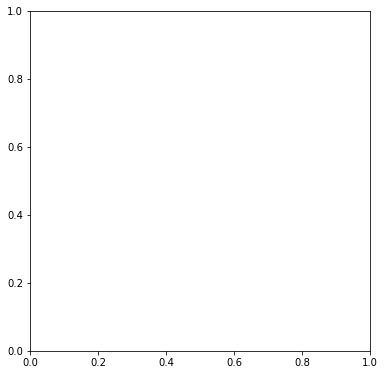

In [304]:
# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di)
    make_plot(i)

In [285]:
title = r'$\Theta_{1_0} = \frac{\pi}{2}, \: \Theta_{2_0} = \pi, \: \dot{\Theta_{1_0}} = 2, \: \dot{\Theta_{2_0}} = 1$'

Text(0.5, 1.0, '$\\Theta_{1_0} = \\frac{\\pi}{2}, \\: \\Theta_{2_0} = \\pi, \\: \\dot{\\Theta_{1_0}} = 2, \\: \\dot{\\Theta_{2_0}} = 1$')

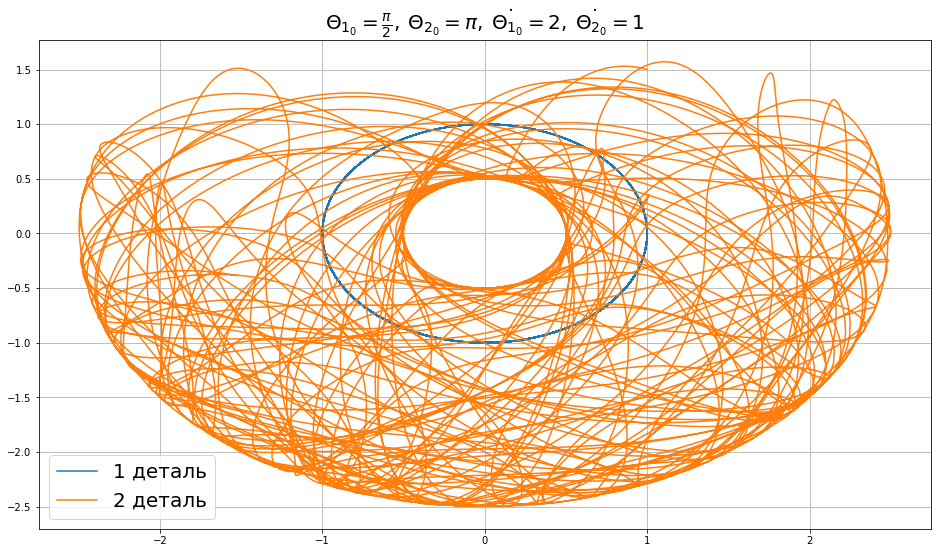

In [286]:
plt.figure(figsize=(16, 9))
plt.plot(x1, y1, label='1 деталь')
plt.plot(x2, y2, label="2 деталь")
plt.grid()
plt.legend(fontsize=20)
plt.title(title, fontsize=20)

Text(0.5, 1.0, '$\\Theta_{1_0} = \\frac{\\pi}{2}, \\: \\Theta_{2_0} = \\pi, \\: \\dot{\\Theta_{1_0}} = 2, \\: \\dot{\\Theta_{2_0}} = 1$')

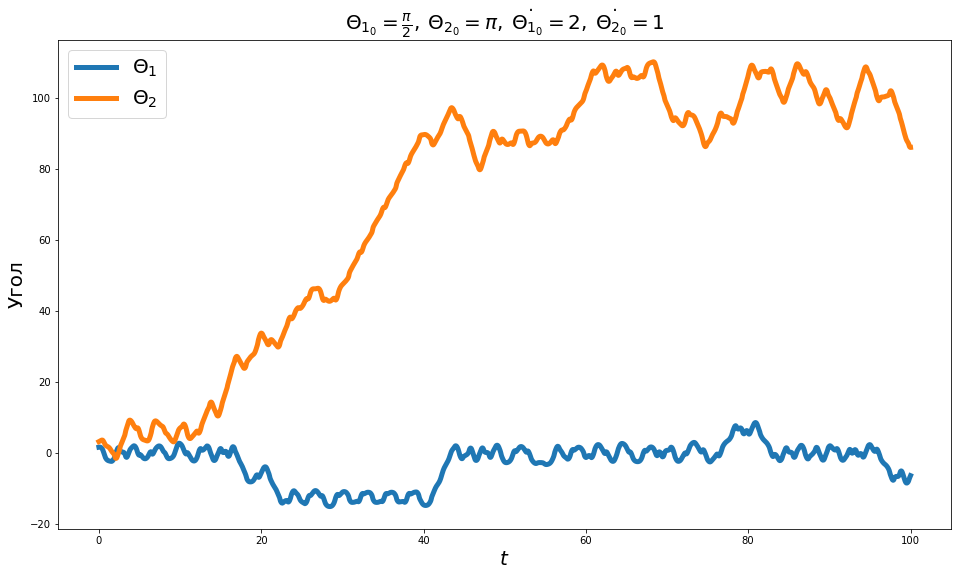

In [287]:
# theta10 = []
# theta20 = []
# for i in range(len(theta1)):
#     theta10.append(theta1[i] % (2 * math.pi))
#     theta20.append(theta2[i] % (2 * math.pi))
    
plt.figure(figsize=(16, 9))
plt.plot(t, theta1, label="$\Theta_1$", linewidth=5)
plt.plot(t, theta2, label="$\Theta_2$", linewidth=5)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("Угол", fontsize=20)
plt.legend(fontsize=20)
plt.title(title, fontsize=20)

Text(0.5, 1.0, '$\\Theta_{1_0} = \\frac{\\pi}{2}, \\: \\Theta_{2_0} = \\pi, \\: \\dot{\\Theta_{1_0}} = 2, \\: \\dot{\\Theta_{2_0}} = 1$')

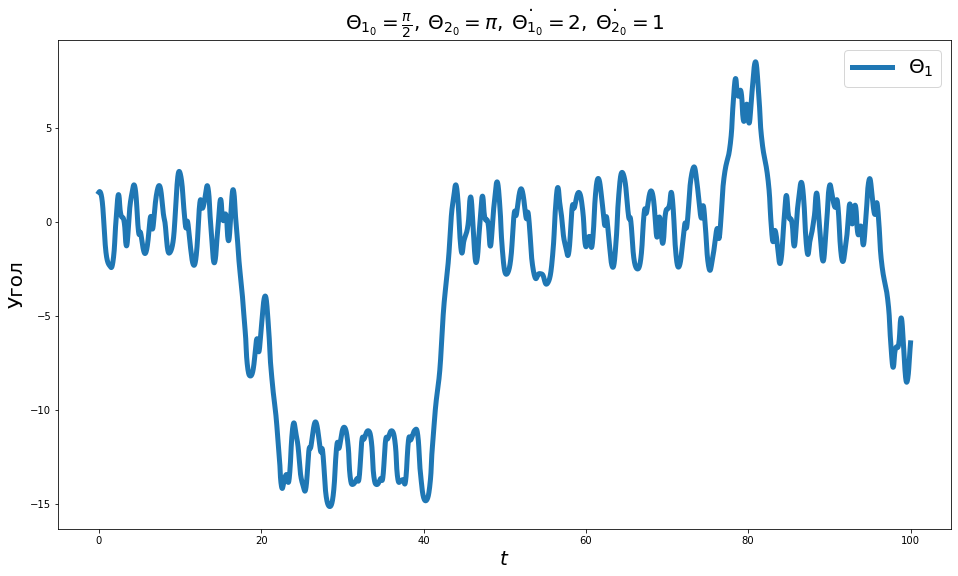

In [288]:
plt.figure(figsize=(16, 9))
plt.plot(t, theta1, label="$\Theta_1$", linewidth=5)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("Угол", fontsize=20)
plt.legend(fontsize=20)
plt.title(title, fontsize=20)

Text(0.5, 1.0, '$\\Theta_{1_0} = \\frac{\\pi}{2}, \\: \\Theta_{2_0} = \\pi, \\: \\dot{\\Theta_{1_0}} = 2, \\: \\dot{\\Theta_{2_0}} = 1$')

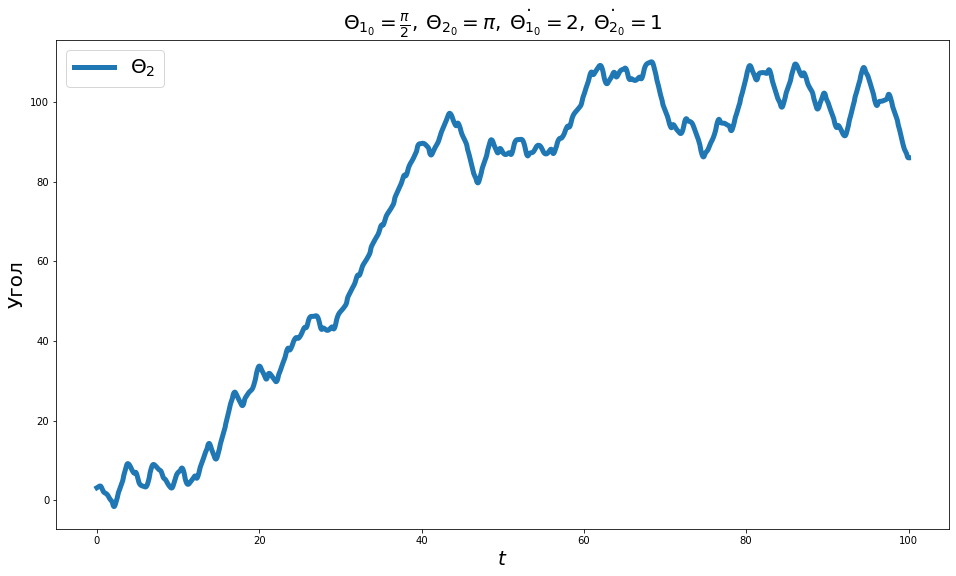

In [289]:
plt.figure(figsize=(16, 9))
plt.plot(t, theta2, label="$\Theta_2$", linewidth=5)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("Угол", fontsize=20)
plt.legend(fontsize=20)
plt.title(title, fontsize=20)

Text(0.5, 1.0, '$\\Theta_{1_0} = \\frac{\\pi}{2}, \\: \\Theta_{2_0} = \\pi, \\: \\dot{\\Theta_{1_0}} = 2, \\: \\dot{\\Theta_{2_0}} = 1$')

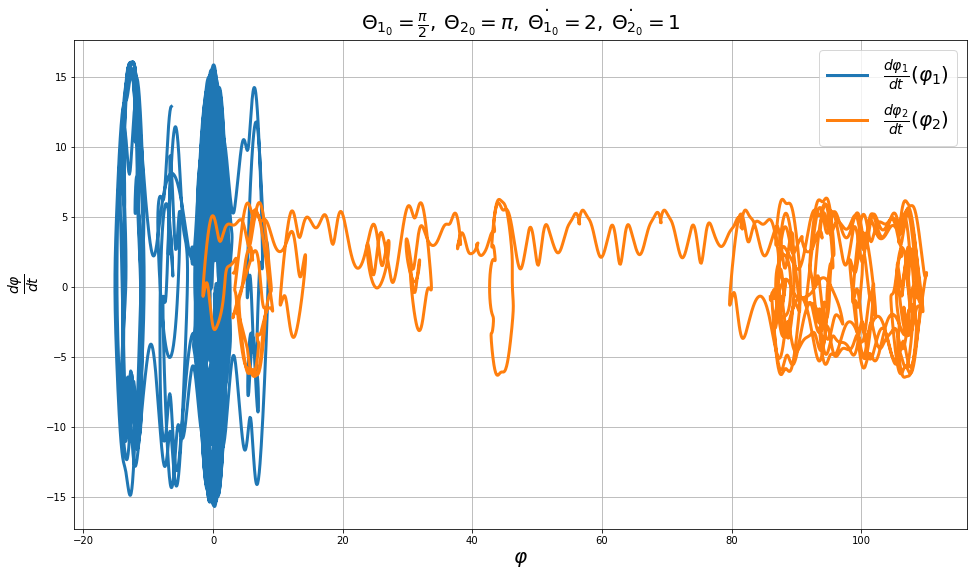

In [290]:
v1 = []
v2 = []

for i in range(len(p_theta1)):
    v1.append(p_theta1[i] / m1)
    v2.append(p_theta2[i] / m2)
    
plt.figure(figsize=(16, 9))
plt.grid()
plt.plot(theta1, v1, label=r'$\frac{d\varphi_1}{dt}(\varphi_1)$', linewidth=3)
plt.plot(theta2, v2, label=r'$\frac{d\varphi_2}{dt}(\varphi_2)$', linewidth=3)
plt.xlabel(r"$\varphi$", fontsize=20)
plt.ylabel(r"$\frac{d\varphi}{dt}$", fontsize=20)
plt.legend(fontsize=20)
plt.title(title, fontsize=20)

Text(0.5, 1.0, '$\\Theta_{1_0} = \\frac{\\pi}{2}, \\: \\Theta_{2_0} = \\pi, \\: \\dot{\\Theta_{1_0}} = 2, \\: \\dot{\\Theta_{2_0}} = 1$')

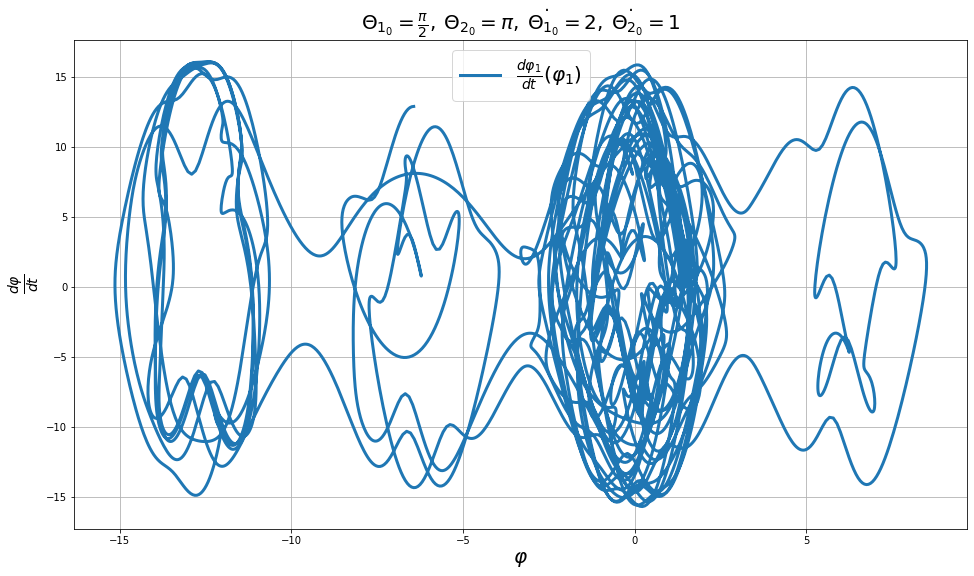

In [291]:
v1 = []

for i in range(len(p_theta1)):
    v1.append(p_theta1[i] / m1)
    
plt.figure(figsize=(16, 9))
plt.grid()
plt.plot(theta1, v1, label=r'$\frac{d\varphi_1}{dt}(\varphi_1)$', linewidth=3)
plt.xlabel(r"$\varphi$", fontsize=20)
plt.ylabel(r"$\frac{d\varphi}{dt}$", fontsize=20)
plt.legend(fontsize=20)
plt.title(title, fontsize=20)

Text(0.5, 1.0, '$\\Theta_{1_0} = \\frac{\\pi}{2}, \\: \\Theta_{2_0} = \\pi, \\: \\dot{\\Theta_{1_0}} = 2, \\: \\dot{\\Theta_{2_0}} = 1$')

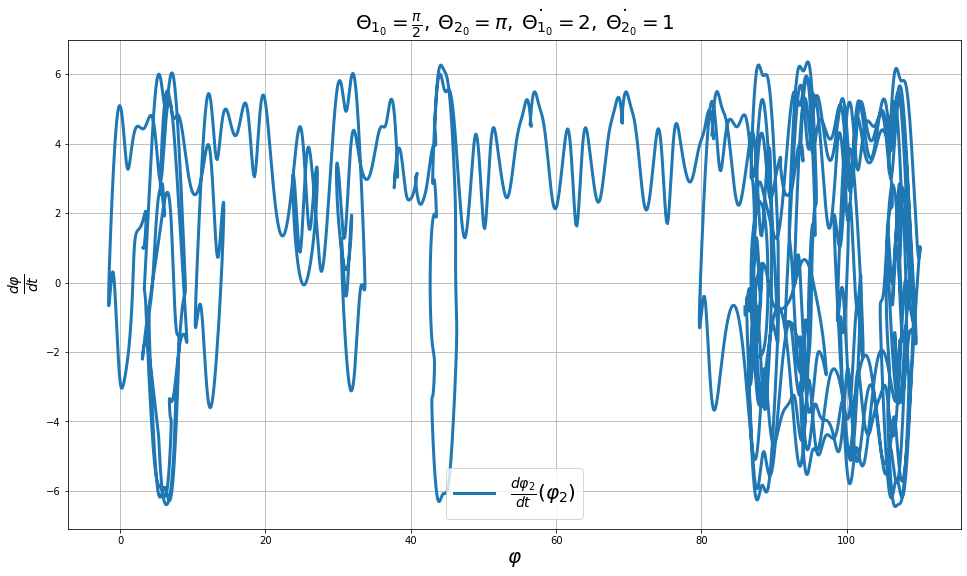

In [292]:
v2 = []

for i in range(len(p_theta1)):
    v2.append(p_theta2[i] / m2)
    
plt.figure(figsize=(16, 9))
plt.grid()
plt.plot(theta2, v2, label=r'$\frac{d\varphi_2}{dt}(\varphi_2)$', linewidth=3)
plt.xlabel(r"$\varphi$", fontsize=20)
plt.ylabel(r"$\frac{d\varphi}{dt}$", fontsize=20)
plt.legend(fontsize=20)
plt.title(title, fontsize=20)